In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


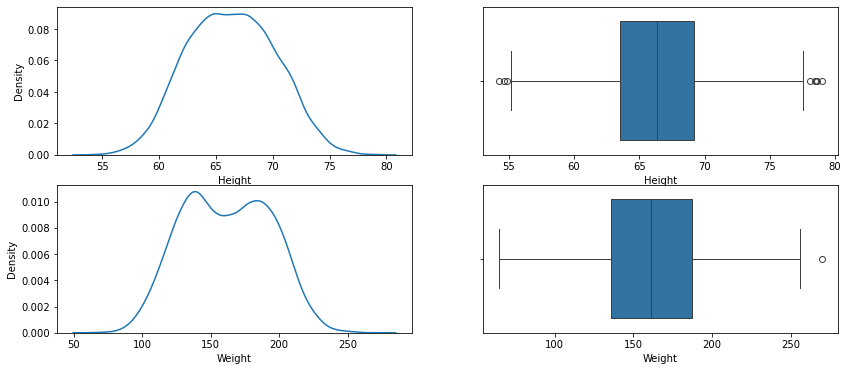

In [4]:
plt.figure(figsize=(14,6))
plt.subplot(2,2,1)
sns.kdeplot(df['Height'])

plt.subplot(2,2,2)
sns.boxplot(x=df['Height'])

plt.subplot(2,2,3)
sns.kdeplot(df['Weight'])

plt.subplot(2,2,4)
sns.boxplot(x=df['Weight'])

plt.show()

In [5]:
df.shape

(10000, 3)

In [6]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [7]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)# both upper limit and lower limit should be symmetric 0.99 and 0.01 | 0.95 and 0.05

## Trimming

In [8]:
df[(df['Height']>=upper_limit)|(df['Height']<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [9]:
new_df = df[(df['Height']<=upper_limit)&(df['Height']>=lower_limit)]

In [10]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot:xlabel='Height'>

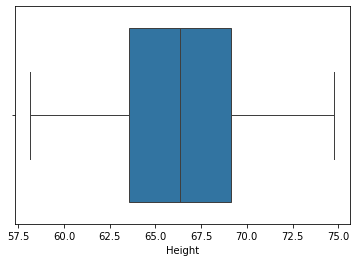

In [11]:
sns.boxplot(x=new_df['Height'])

/tmp/ipykernel_7158/1622920233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Height'])


<AxesSubplot:xlabel='Height', ylabel='Density'>

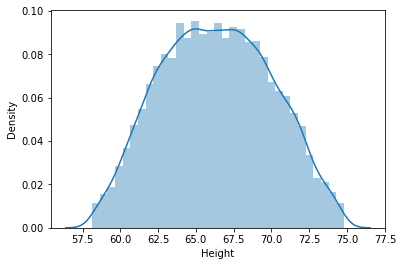

In [12]:
sns.distplot(new_df['Height'])

In [13]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

## Capping --> Winsorization

In [14]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height']<=lower_limit,
                lower_limit,
                df['Height']))

In [15]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [16]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

/tmp/ipykernel_7158/3945773010.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<AxesSubplot:xlabel='Height', ylabel='Density'>

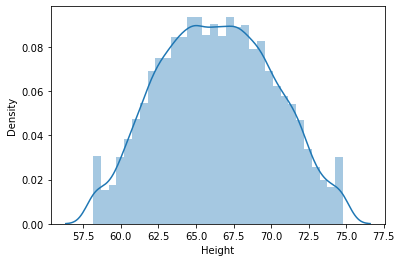

In [17]:
sns.distplot(df['Height'])

<AxesSubplot:xlabel='Height'>

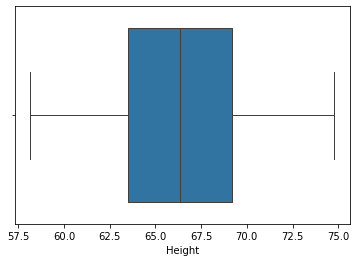

In [18]:
sns.boxplot(x=df['Height'])